In [2]:
from vars import *
%matplotlib inline
#
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## BER
### Doppler

In [4]:
# 16QAM
data_16qam = pd.read_csv('results/BER_16QAM.csv')

In [5]:
data_16qam.columns


Index(['BER_R_perfect', 'BER_R_cubic', 'BER_R_fft', 'BER_D_perfect',
       'BER_D_cubic', 'BER_D_fft', 'snr', 'pilot_spacing', 'path', 'speed',
       'carrier_freq', 'mod_complexity', 'Unnamed: 12'],
      dtype='object')

In [ ]:
data_16qam_path_5  = data_16qam[data_16qam['path'] == 5]
data_16qam_path_40 = data_16qam[data_16qam['path'] == 40]

In [92]:
bers_label = ['BER_R_perfect', 'BER_R_cubic', 'BER_R_fft', 'BER_D_perfect', 'BER_D_cubic', 'BER_D_fft']
bers_axis = ['Rayleigh Perfect', 'Rayleigh Cubic', 'Rayleigh FFT', 'Multipath Perfect', 'Multipath Cubic', 'Multipath FFT']

PATHS         = [5, 40]
PILOT_SPACING = [5, 10, 20]
SPEED         = [30, 120]
CARRIER_FREQ  = [738, 35e8]


Text(0.5, 1.0, 'Paths = 40')

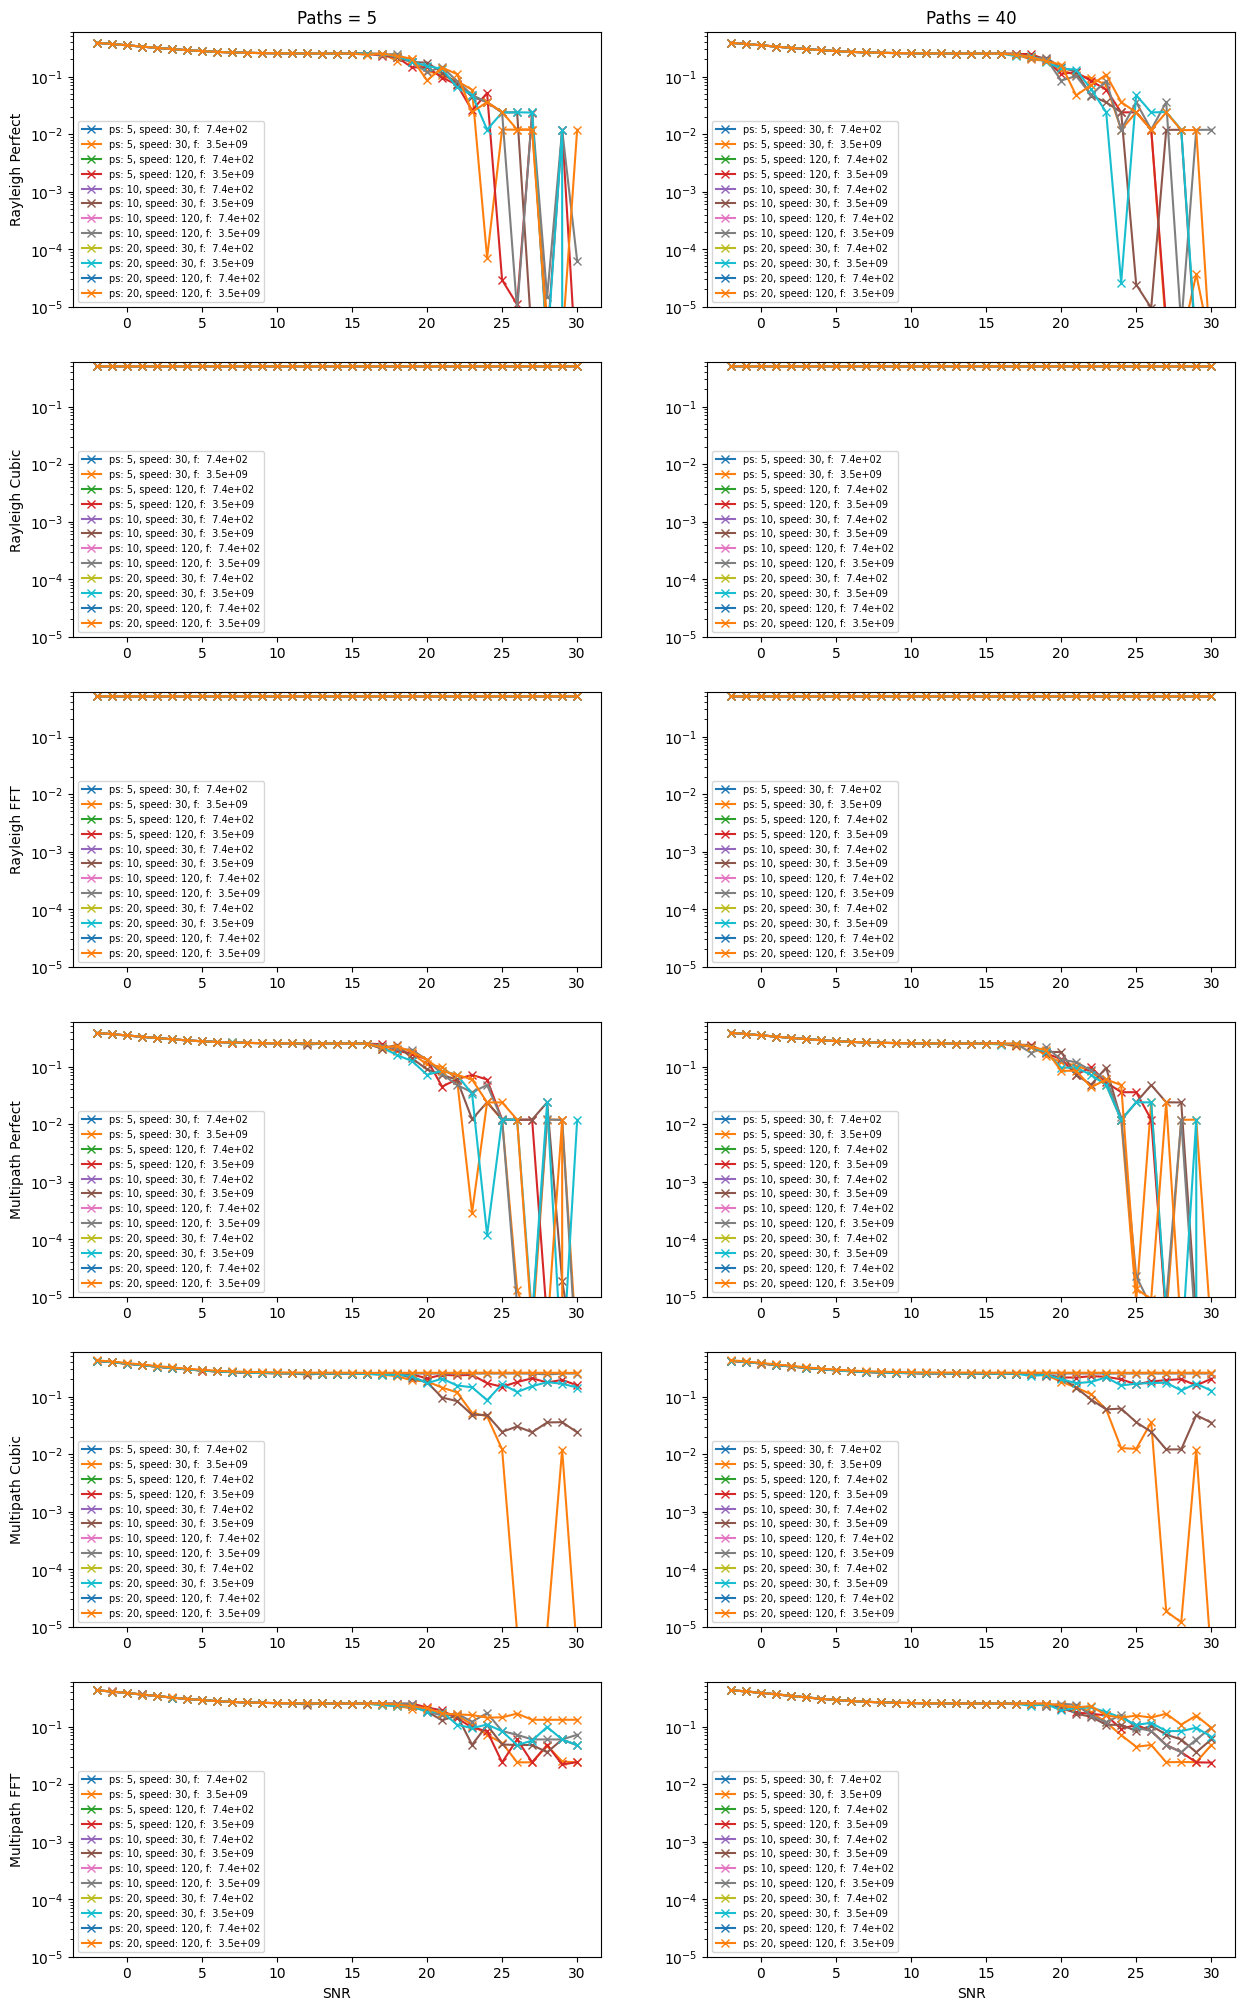

In [93]:
# paths
path_5  = data_16qam[data_16qam['path'] == 5]
path_40 = data_16qam[data_16qam['path'] == 40]

fig, ax = plt.subplots(6, 2, figsize=(15, 25))
for pilot_spacing in PILOT_SPACING:
    for speed in SPEED:
        for carrier_freq in CARRIER_FREQ:
            for i, ber in enumerate(bers_label):
                path_5_filtered = path_5[(path_5['pilot_spacing'] == pilot_spacing) & (path_5['speed'] == speed) & (path_5['carrier_freq'] == carrier_freq)]
                path_40_filtered = path_40[(path_40['pilot_spacing'] == pilot_spacing) & (path_40['speed'] == speed) & (path_40['carrier_freq'] == carrier_freq)]
                ax[i][0].plot(path_5_filtered['snr'], path_5_filtered[ber], 'x-', label=f'ps: {pilot_spacing}, speed: {speed}, f: {carrier_freq: .2g}')
                ax[i][1].plot(path_40_filtered['snr'], path_40_filtered[ber], 'x-', label=f'ps: {pilot_spacing}, speed: {speed}, f: {carrier_freq: .2g}')

for i in range(6):
    ax[i][0].set_ylabel(bers_axis[i])
    ax[i][0].legend(loc="lower left", fontsize="7")
    ax[i][1].legend(loc="lower left", fontsize="7")
    ax[i][0].set_ylim(1e-5, 0.6)
    ax[i][1].set_ylim(1e-5, 0.6)
    ax[i][0].set_yscale('log')
    ax[i][1].set_yscale('log')

ax[5][0].set_xlabel("SNR")
ax[5][1].set_xlabel("SNR")

ax[0][0].set_title("Paths = 5")
ax[0][1].set_title("Paths = 40")

# fig.suptitle(f"Path comparison")

Text(0.5, 1.0, 'Carrier freq = 3.5 GHz')

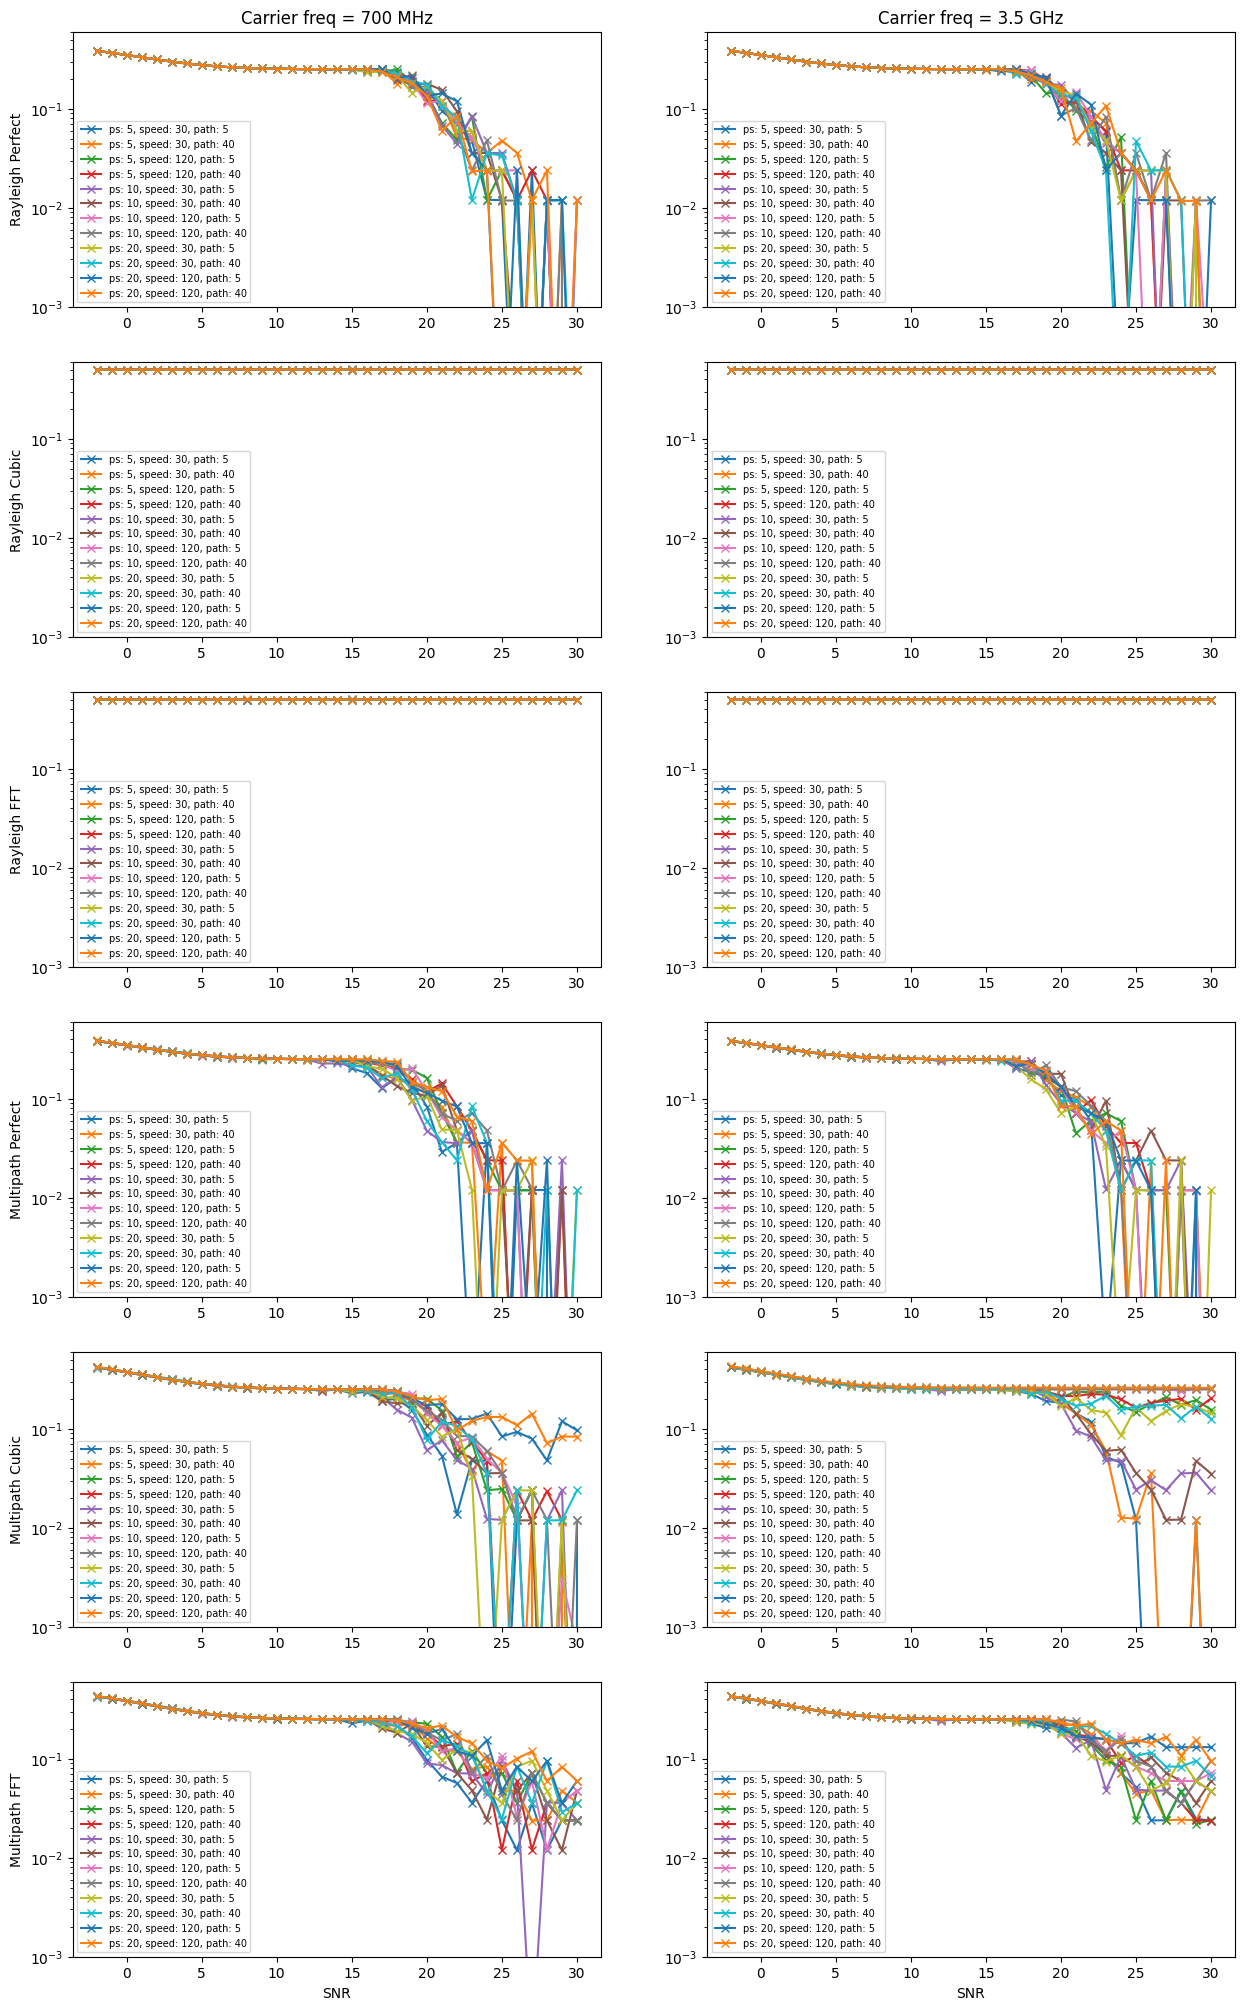

In [94]:
# paths
cf_7  = data_16qam[data_16qam['carrier_freq'] == 7e8]
cf_35 = data_16qam[data_16qam['carrier_freq'] == 35e8]

fig, ax = plt.subplots(6, 2, figsize=(15, 25))
for pilot_spacing in PILOT_SPACING:
    for speed in SPEED:
        for path in PATHS:
            for i, ber in enumerate(bers_label):
                cf_7_filtered = cf_7[(cf_7['pilot_spacing'] == pilot_spacing) & (cf_7['speed'] == speed) & (cf_7['path'] == path)]
                cf_35_filtered = cf_35[(cf_35['pilot_spacing'] == pilot_spacing) & (cf_35['speed'] == speed) & (cf_35['path'] == path)]
                ax[i][0].plot(cf_7_filtered['snr'], cf_7_filtered[ber], 'x-', label=f'ps: {pilot_spacing}, speed: {speed}, path: {path}')
                ax[i][1].plot(cf_35_filtered['snr'], cf_35_filtered[ber], 'x-', label=f'ps: {pilot_spacing}, speed: {speed}, path: {path}')

for i in range(6):
    ax[i][0].set_ylabel(bers_axis[i])
    ax[i][0].legend(loc="lower left", fontsize="7")
    ax[i][1].legend(loc="lower left", fontsize="7")
    ax[i][0].set_ylim(1e-3, 0.6)
    ax[i][1].set_ylim(1e-3, 0.6)
    ax[i][0].set_yscale('log')
    ax[i][1].set_yscale('log')

ax[5][0].set_xlabel("SNR")
ax[5][1].set_xlabel("SNR")

ax[0][0].set_title("Carrier freq = 700 MHz")
ax[0][1].set_title("Carrier freq = 3.5 GHz")
